# Midterm Project Competition

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns

data=pd.read_csv('train_covid.csv')

"""
mean_hh_cli_ct                                            4784 non-null   float64
pct_worried_finances                                      0 non-null      float64
pct_cmnty_cli                                             4804 non-null   float64

"""
#date不是一個特徵值，除非使用OrdinalEncoder，轉換成數列
#如果test的data是未來的這個特徵值，我認為不是一個好的分類指標
#而pct_worried_finances都是NaN可以直接drop掉
data=data.drop(["date","pct_worried_finances"],axis=1)
data.iloc[:,3:] =data.iloc[:,3:].astype("float32")
#分割feature和label
length=data.shape[1]
X=data.iloc[:,0:length-1]
y=data.iloc[:,length-1]
X.fillna(np.nan)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

 <font size="4">

## Data Prepare

1. ColumTransformer & sklearn.compose.make_column_selector
   1. for int or float Using **SimpleImputer(missing_values=np.nan, strategy='mean')S -> tandardScaler()->MinMaxScaler** 
   2. for str or object Using **Target Encoding()**
2. sklearn.feature_selection.RFECV

</font> 

## load package

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import CondensedNearestNeighbour 
from imblearn.under_sampling import TomekLinks
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
#由於RFECV要跑很久，因此我將這些index存起來直接用
def feacture_selection(X_res):
    index_list=[0, 3, 5, 7, 8, 9, 22, 23, 25, 29, 31, 32, 34, 38, 41, 51, 53, 73, 76, 77, 83, 88]
    X_sel=X_res[:,index_list] #from RFECV 
    return X_sel 

## sklearn.feature_selection.RFECV

In [4]:
# XGBClassifier=xgb.XGBClassifier(objective= 'binary:logistic',eval_metric='mlogloss',
#     tree_method="gpu_hist",enable_categorical=True, use_label_encoder=False,
#     seed=42,learning_rate=0.05,max_depth=6,min_child_weight=11,subsample=0.8,colsample_bytree=0.7,n_estimators=100,gamma=0.2)
# num_pipe = make_pipeline(
#     SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler(),
#     MinMaxScaler(feature_range=(1, 100))
    
# )
# cat_pipe = make_pipeline(
#     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
#     TargetEncoder()
# )    
# preprocessor = make_column_transformer(
#     (cat_pipe, selector(dtype_exclude="number")),
#     (num_pipe, selector(dtype_include="number"))
   
#     # remainder='passthrough'
    
# )
# preparedata=make_pipeline_with_sampler(
#     preprocessor,RandomUnderSampler(random_state=42)
# )

# X_pre=preprocessor.fit_transform(X,y)
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_pre, y)

# X_pre

In [5]:
# print(preprocessor.fit_transform(X,y).shape)
# print(X.shape)
# X_pre=preprocessor.fit_transform(X,y)
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_pre, y)
# print(X_res.shape)
# # print(type(X_res))
# # y_res=pd.DataFrame(y_res)
# # print(y_res.shape)

Optimal number of features : 22


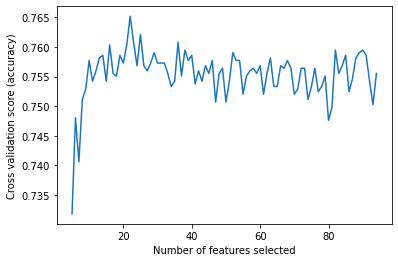

In [55]:
# from sklearn.feature_selection import RFECV
# min_features_to_select = 5  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=XGBClassifier,
#     step=1,
#     cv=5,
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv.fit(X_res,y_res)
# print("Optimal number of features : {}".format(rfecv.n_features_))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()


In [56]:
index_list=[]
for index,i in enumerate(rfecv.ranking_):
    if i == 1: 
        # print(index)
        index_list.append(index)
# feacture_extraction(X_pre)
# X_res[:,index_list].shape

# RFECV_result
print(index_list)

[0, 3, 5, 7, 8, 9, 22, 23, 25, 29, 31, 32, 34, 38, 41, 51, 53, 73, 76, 77, 83, 88]


```python
rfecv.ranking_
[ 1, 30, 18, 54,  1,  9,  1, 26, 55, 43, 59, 32, 74, 81, 53, 35, 19,
       36, 13, 11,  1, 23, 17, 66, 33, 39,  7, 44,  1,  4, 67, 15, 76, 79,
       78,  1, 22, 34, 40, 62, 48, 57,  1, 58, 41, 21, 52, 73, 14, 37,  6,
       83, 31, 69, 27, 50, 42, 82, 75, 60, 38, 29, 12, 72, 51, 24, 47,  8,
       68, 49, 16, 20, 70,  2,  3, 64, 25, 77, 80, 84,  1,  5, 56, 71, 65,
       28, 63, 10, 46, 45, 61]
```

# XGBClassifier

## Make Pipeline

In [11]:
# QuantileTransformer() 效果反而沒有比較好 #MinMaxScaler([1,100])有加這個 1-100 從 0.7->0.71
num_pipe = make_pipeline_with_sampler(
    SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler(),MinMaxScaler([1,100])
    
)
cat_pipe = make_pipeline_with_sampler(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    TargetEncoder()
)    
preprocessor = make_column_transformer(
    (cat_pipe, selector(dtype_exclude="number")),
    (num_pipe, selector(dtype_include="number")),
    
)
preparedata=make_pipeline_with_sampler(
    preprocessor,RandomUnderSampler(random_state=42)
)

# 資料預處理
X_pre=preprocessor.fit_transform(X,y)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_pre, y)
# sklearn.feature_selection.RFECV
X_sel=feacture_selection(X_res) #from RFECV 
y_sel=y_res

XGBClassifier= xgb.XGBClassifier(objective= 'binary:logistic',eval_metric='mlogloss',
    tree_method="gpu_hist",enable_categorical=True, use_label_encoder=False,
    seed=42,learning_rate=0.05,max_depth=6,min_child_weight=11,subsample=0.8,colsample_bytree=0.7,n_estimators=1000,gamma=0.2)
clf = make_pipeline_with_sampler(
    XGBClassifier
)
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'xgbclassifier', 'xgbclassifier__objective', 'xgbclassifier__use_label_encoder', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__enable_categorical', 'xgbclassifier__gamma', 'xgbclassifier__gpu_id', 'xgbclassifier__importance_type', 'xgbclassifier__interaction_constraints', 'xgbclassifier__learning_rate', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__monotone_constraints', 'xgbclassifier__n_estimators', 'xgbclassifier__n_jobs', 'xgbclassifier__num_parallel_tree', 'xgbclassifier__predictor', 'xgbclassifier__random_state', 'xgbclassifier__reg_alpha', 'xgbclassifier__reg_lambda', 'xgbclassifier__scale_pos_weight', 'xgbclassifier__subsample', 'xgbclassifier__tree_method', 'xgbclassifier__validate_parameters', 'xgbclassifier__verbosi

In [12]:
subsample=np.array(range(1,10,1))/10
import sklearn.metrics
sklearn.metrics.SCORERS.keys()
## 結論 undersample可能幸運抽掉一些

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Model Training

In [16]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
param_grid = { 
    # "condensednearestneighbour__sampling_strategy":["all","not majority"],
    #svc 正規化開強一點
    'xgbclassifier__learning_rate': [0.05], 
    'xgbclassifier__max_depth': [8], # 2,4,6中 6最好
    'xgbclassifier__min_child_weight': [25],# range(5,50,5)中 25最好
    
    'xgbclassifier__subsample': [0.8],# np.array(range(1,10,1))/10 中 0.4 best_score最好 但kaggle score =0.6777 反而0.8的是0.69977
    'xgbclassifier__colsample_bytree': [0.7],
    'xgbclassifier__n_estimators':[1000], #1000,2000,3000,4000,5000中 5000最好 越多越好 (1000)kaggle成績最好
    "xgbclassifier__gamma":[0.9] # np.array(range(1,20,1))/10中 1.4 CV成績最好  但0.9kaggle成績最好
    
}
# GridSearchCV : refit==True 會重新用整個data重新訓練一次
gs=GridSearchCV(estimator=clf,
               param_grid=param_grid,
               scoring={"f1": "f1", "f1_weighted accuracy": "f1_weighted"},
               refit="f1",
                # scoring='f1_weighted',
               return_train_score=True,
               cv=5,
            # cv=TimeSeriesSplit(),#試下來這個比較好(怪怪的)
               n_jobs = -1,
              )
gs=gs.fit(X_sel,y_res)

## Recodr Model Training Result

In [17]:
# print(gs.best_params_)

# df=pd.DataFrame(gs.cv_results_)
# gs.cv_results_.keys()
# gs.best_estimator_
# gs.cv_results_.keys()
print(gs.best_score_)
gs.best_estimator_

0.7415097246315121


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=True,
                               eval_metric='mlogloss', gamma=0.9, gpu_id=0,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_delta_step=0,
                               max_depth=8, min_child_weight=25, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, seed=42, subsample=0.8,
                               tree_method='gpu_hist', use_label_encoder=False,
                               validate_parameters=1, ...))]

In [18]:
index=[]
index+= ["XGBClassifier+undersample+RFECV"]
scores = {"f1": [], "f1_weighted accuracy": []}

scores["f1"].append(gs.cv_results_["mean_test_f1"].mean())
scores["f1_weighted accuracy"].append(gs.cv_results_["mean_test_f1_weighted accuracy"].mean())

df_scores = pd.DataFrame(scores,index)
print(df_scores)

column_index=['param_xgbclassifier__n_estimators','param_xgbclassifier__min_child_weight','param_xgbclassifier__subsample','mean_test_f1_weighted accuracy']
df=pd.DataFrame(gs.cv_results_)
# print(df.columns)
df[column_index]

                                      f1  f1_weighted accuracy
XGBClassifier+undersample+RFECV  0.74151              0.751037


,param_xgbclassifier__n_estimators,param_xgbclassifier__min_child_weight,param_xgbclassifier__subsample,mean_test_f1_weighted accuracy
0,1000,25,0.8,0.751037


## Test data 訓練

In [76]:
## X_test資料愈處理
test=pd.read_csv("test_covid.csv")

"""
mean_hh_cli_ct                                            4784 non-null   float64
pct_worried_finances                                      0 non-null      float64
pct_cmnty_cli                                             4804 non-null   float64

"""
# test=test.drop(['date', 'state_code', 'gender', 'age_bucket',"mean_hh_cli_ct","pct_worried_finances","pct_cmnty_cli"],axis=1)

X_test=test.drop(["date","pct_worried_finances"],axis=1)
X_test=preprocessor.transform(X_test)
X_test=feacture_selection(X_test)
X_test.shape

(906, 22)

In [77]:
## 產生submit.csv 
y_test=gs.best_estimator_.predict(X_test)
y_test=y_test.astype(np.int64)
col=['test_condition']
df=pd.DataFrame(y_test,columns=col)
df.to_csv('xgboost.csv', index = True,index_label='id') 


## Record Model Score

In [23]:
scores.update({"kaggle score":[]})
scores["kaggle score"].append(0.71081)
df_scores = pd.DataFrame(scores,index)
print(df_scores)

                                       f1  f1_weighted accuracy  kaggle score
XGBClassifier+undersample+RFECV  0.747514              0.755499         0.652


In [138]:
Total_df_scores=pd.read_excel("實驗數據\不同模型分數.xlsx",index_col=0)
Total_df_scores=pd.concat([Total_df_scores,df_scores])
Total_df_scores.to_excel("實驗數據\不同模型分數.xlsx")

## Confusion Matrix

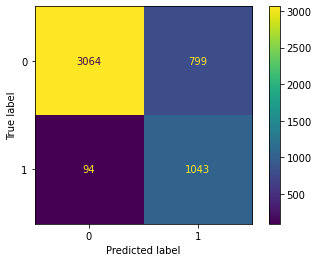

f1_score:  0.7002349781805975
accuracy_score:  0.8214


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
X_prepro=preprocessor.transform(X)

X_prepro=feacture_selection(X_prepro)# 用REFCV的結果，去抓X的Feacture
y_pred=gs.best_estimator_.predict(X_prepro)
cm=confusion_matrix(y, y_pred)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()

plt.show()
print("f1_score:  {}".format(f1_score(y, y_pred)))
from sklearn.metrics import accuracy_score
print("accuracy_score:  {}".format(accuracy_score(y, y_pred)))

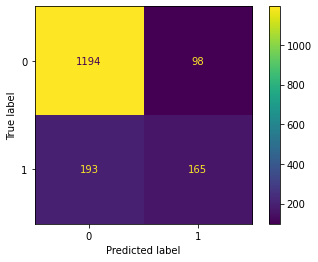

f1_score:  0.5314009661835749
accuracy_score:  0.8236363636363636


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=True,
                               eval_metric='mlogloss',
                               gamma=0.9,
                               gpu_id=0,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_delta_step=0,
                               max_depth=6,
                               min_child_weight=25,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, seed=42, subsample=0.8,
                               tree_method='gpu_hist', use_label_encoder=False,
                               validate_parameters=1)
X_model=preprocessor.transform(X)

X_model=feacture_selection(X_model)
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.33, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()

plt.show()
print("f1_score:  {}".format(f1_score(y_test, y_pred)))
from sklearn.metrics import accuracy_score
print("accuracy_score:  {}".format(accuracy_score(y_test, y_pred)))